### Importing Libraries:

In [31]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import cpi

### Importing Dataset:

In [2]:
titanic = pd.read_csv("data/titanic.csv")

### Checking the dataset:

In [3]:
titanic.head(5)

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic.tail(5)

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_dest
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,1309.0,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping row 1309 as it doesn't have any values:

In [5]:
titanic.drop(titanic.index[1309], inplace=True)

### General info about the data:

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
PassengerId    1309 non-null float64
Pclass         1309 non-null float64
Survived       1309 non-null float64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
Sibsp          1309 non-null float64
Parch          1309 non-null float64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Boat           486 non-null object
Body           121 non-null float64
Home_dest      745 non-null object
dtypes: float64(8), object(7)
memory usage: 163.6+ KB


In [7]:
titanic.drop(columns=["Boat", "Body", "Home_dest"], inplace=True)

In [8]:
titanic.head(1)

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S


### Checking for total number of null values:

In [9]:
titanic.isnull().sum()

PassengerId       0
Pclass            0
Survived          0
Name              0
Sex               0
Age             263
Sibsp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Basic statistical details:

In [10]:
titanic.describe()

,PassengerId,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


### Finding the zero values in Fare column 

In [11]:
fare0 = titanic.query("Fare == 0")

In [12]:
fare0

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
7,8.0,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050,0.0,A36,S
70,71.0,1.0,0.0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0.0,0.0,112051,0.0,NaN,S
125,126.0,1.0,0.0,"Fry, Mr. Richard",male,NaN,0.0,0.0,112058,0.0,B102,S
150,151.0,1.0,0.0,"Harrison, Mr. William",male,40.0,0.0,0.0,112059,0.0,B94,S
170,171.0,1.0,1.0,"Ismay, Mr. Joseph Bruce",male,49.0,0.0,0.0,112058,0.0,B52 B54 B56,S
223,224.0,1.0,0.0,"Parr, Mr. William Henry Marsh",male,NaN,0.0,0.0,112052,0.0,NaN,S
234,235.0,1.0,0.0,"Reuchlin, Jonkheer. John George",male,38.0,0.0,0.0,19972,0.0,NaN,S
363,364.0,2.0,0.0,"Campbell, Mr. William",male,NaN,0.0,0.0,239853,0.0,NaN,S
384,385.0,2.0,0.0,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0,0.0,239853,0.0,NaN,S
410,411.0,2.0,0.0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0.0,0.0,239854,0.0,NaN,S


There are 15 observations with "Fare" recorded as zero and I'd like to correct them. I will use the Ticket class ("Pclass") and port of embarkation ("Embarked") to estimate the missing fare values.

In [13]:
# Grouping by Pclass and Embarked to get the mean Fare prices for different classes and embarkation locations:
fares = titanic.groupby(["Pclass", "Embarked"])[['Fare']].mean()
fares

Fare
Pclass Embarked            
1.0    C         106.845330
       Q          90.000000
       S          72.148094
2.0    C          23.300593
       Q          11.735114
       S          21.206921
3.0    C          11.021624
       Q          10.390820
       S          14.435422

In [14]:
def fill_fare(pclass):
    """
    Input: Int
    Output: Float
    
    Receive the class number of the passenger and returns the average fare for the class and place 
    of embarkment.
    """
    global fares
    if pclass == 1:
        return round(fares.loc[1, 'S']['Fare'], 2)
    elif pclass == 2:
        return round(fares.loc[2, 'S']['Fare'], 2)
    else:
        return round(fares.loc[3, 'S']['Fare'], 2)
    
    

In [15]:
# Changing the Fare price for the rows that had a 0 in it.
fare0['Fare'] = fare0['Pclass'].apply(fill_fare)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
titanic.update(fare0)

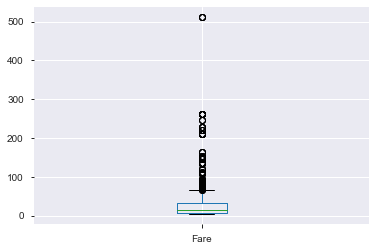

In [17]:
titanic.Fare.plot(kind="box")

### Finding missing Embarked values

In [18]:
titanic[titanic.Embarked.isna()]

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
168,169.0,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN
284,285.0,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN


In [19]:
# Finding the means of 1st class fares embarked from different ports:
titanic.query("Pclass == 1").groupby(["Embarked"])["Fare"].mean()

Embarked
C    106.845330
Q     90.000000
S     75.001484
Name: Fare, dtype: float64

Two people with missing cabin values both have 1st class tickets and they both paid 80 Dollars, so looking at the means above, we can see that the closest we have to $80 is "S", which is the Southampton port. So we can assign these two missing Embark values as "S":

In [20]:
replace = {'Embarked': "S"}
titanic.fillna(value=replace, inplace=True)

### In cabin values, 75% of the values are missing, so it's better to drop them:

In [21]:
titanic.drop(columns="Cabin", inplace=True)

In [22]:
titanic.dtypes

PassengerId    float64
Pclass         float64
Survived       float64
Name            object
Sex             object
Age            float64
Sibsp          float64
Parch          float64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [23]:
titanic.head(1)

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,S


In [24]:
titanic = titanic.astype({"PassengerId": "int", "Survived": "int", "Pclass": "int", "Sibsp": "int", "Parch": "int"})

### Dropping rows with missing age values:

In [25]:
titanic.dropna(subset=["Age"], inplace=True)

It's better to drop the rows with missing age values, as it would be misleading to fill them with the mean

# Adding a new column for fares adjusted to today's rate

In [34]:
def inflation(fare):
    return cpi.inflate(fare, 1913)

In [35]:
titanic.Fare.apply(inflation)

0       5360.436931
1       3843.966247
2       3843.966247
3       3843.966247
4       3843.966247
           ...     
1301     183.257381
1304     366.621293
1306     183.257381
1307     183.257381
1308     199.744205
Name: Fare, Length: 1046, dtype: float64

In [36]:
titanic["Actual_Fare"] = titanic.Fare.apply(inflation)

### Checking the overview of the dataset for the last time:

In [26]:
titanic.profile_report()

### Exporting the final and cleaned dataset:

In [38]:
titanic.to_csv("titanic-cleaned-alldata.csv", index=False)

In [28]:
# biostat.mc.vanderbilt.edu › wiki › pub › Main › DataSets › titanic3
# http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"

In [39]:
titanic

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Actual_Fare
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,5360.436931
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,3843.966247
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,3843.966247
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,3843.966247
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,3843.966247
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1302,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C,183.257381
1304,1305,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,366.621293
1306,1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,183.257381
1307,1308,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,183.257381
